## The CSV File Format

One simple way to store data in a text file is to write the data as a series of values separated by commas, called comma-separated values.

The CSV files were downloaded from: https://github.com/ehmatthes/sitka_weather_hx

`csv.reader()` creates a reader object associated with the file `f`

`next()` return the next line in a csv file.

BTW, Sitka is a city in Alaska and AKDT means Alaska Daylight Time.

Max TemperatureF tells us that the second value in each line is the maximum temperature for that date in F degrees.

### Parsing the CSV File Headers


In [5]:
import csv

filename = 'sitka_weather_07-2014.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    print (header_row)
    
    print ("")
    for index, column_header in enumerate(header_row):
        print(index, column_header)

['AKDT', 'Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF', 'Max Dew PointF', 'MeanDew PointF', 'Min DewpointF', 'Max Humidity', ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressureIn', ' Mean Sea Level PressureIn', ' Min Sea Level PressureIn', ' Max VisibilityMiles', ' Mean VisibilityMiles', ' Min VisibilityMiles', ' Max Wind SpeedMPH', ' Mean Wind SpeedMPH', ' Max Gust SpeedMPH', 'PrecipitationIn', ' CloudCover', ' Events', ' WindDirDegrees']

0 AKDT
1 Max TemperatureF
2 Mean TemperatureF
3 Min TemperatureF
4 Max Dew PointF
5 MeanDew PointF
6 Min DewpointF
7 Max Humidity
8  Mean Humidity
9  Min Humidity
10  Max Sea Level PressureIn
11  Mean Sea Level PressureIn
12  Min Sea Level PressureIn
13  Max VisibilityMiles
14  Mean VisibilityMiles
15  Min VisibilityMiles
16  Max Wind SpeedMPH
17  Mean Wind SpeedMPH
18  Max Gust SpeedMPH
19 PrecipitationIn
20  CloudCover
21  Events
22  WindDirDegrees


### Extracting and Reading Data

Initially, we want to plot the maximum temperature per day. So we need to extract the data from columns 0 and 1.

Because we've already read the header ow, the loop will begin at the second line wheere the actual data begins.

In [4]:
import csv

# Get high temperatures from file.
filename = 'sitka_weather_07-2014.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    highs = []
    for row in reader:
        high = int(row[1])
        highs.append(high)
    
    print (highs)

[64, 71, 64, 59, 69, 62, 61, 55, 57, 61, 57, 59, 57, 61, 64, 61, 59, 63, 60, 57, 69, 63, 62, 59, 57, 57, 61, 59, 61, 61, 66]


### Plotting Data in a Temperature Chart

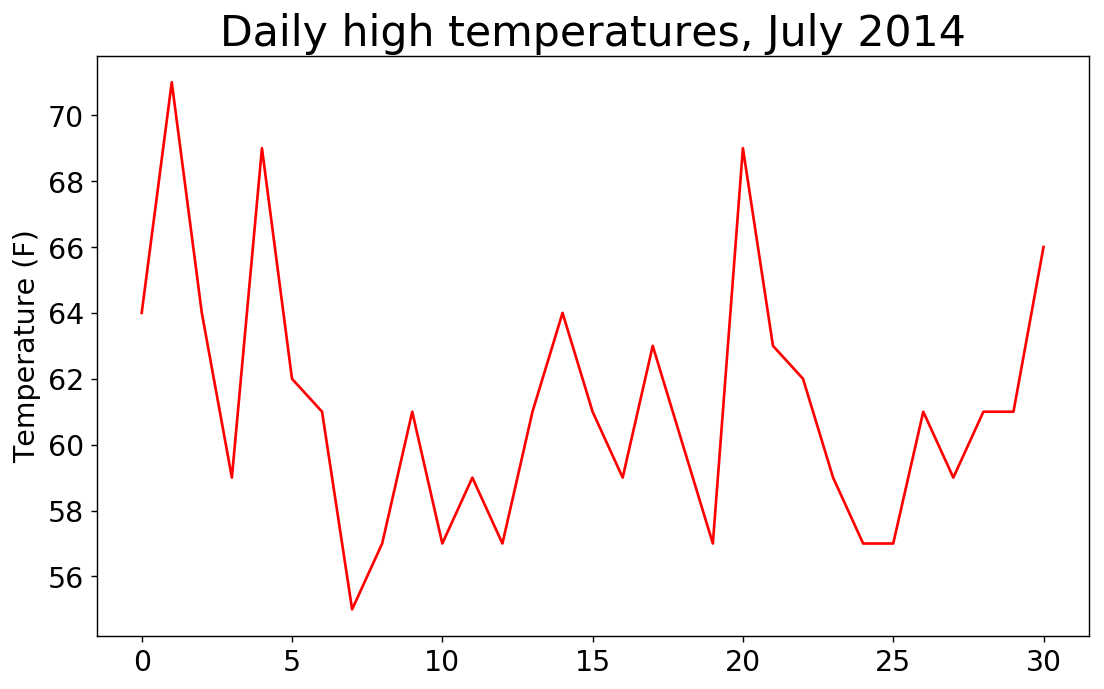

In [19]:
from matplotlib import pyplot as plt

# Plot data.
fig = plt.figure(dpi=128, figsize=(10, 6))
plt.plot(highs, c='red')

# Format plot.
plt.title("Daily high temperatures, July 2014", fontsize=24)
plt.xlabel('', fontsize=16)
plt.ylabel("Temperature (F)", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.show()

### The datetime Module

The data will be read in as a string, so we need a way to convert the string '2014-7-1'  to an object representing this date.

`strptime()` takes the string containing the date as the first argument. The second argument tells Python how the date is formatted.

In this example, '%Y-'  tells Python to interpret the part of the string before the first dash as a four-digit year, and so on.

`strptime()` can take a variety of arguments to determine how to interpret the date.

In [13]:
from datetime import datetime
first_date = datetime.strptime('2014-7-1', '%Y-%m-%d')
print(first_date)

### Plotting Dates

We can now improve our plot of the temperature data by extracting date for the daily highs and passing the dates and the highs to `plot()`.

`fig.autofmt_xdate()` draws the date labels diagonally to prevent them from overlapping.

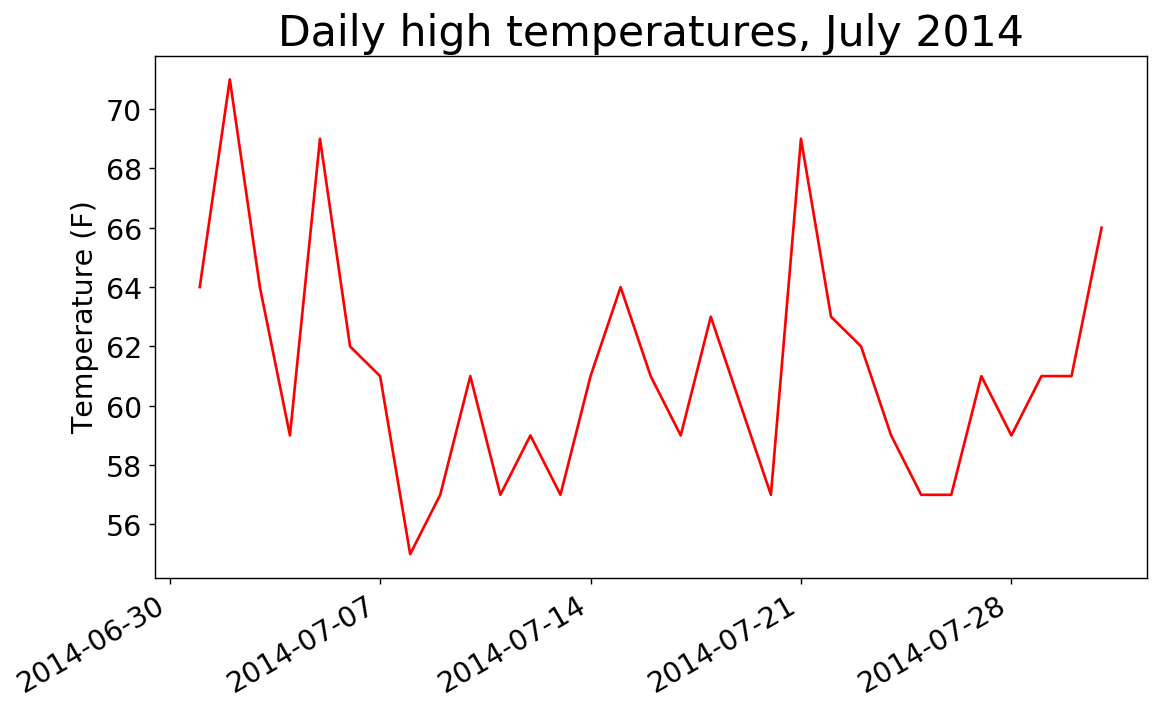

In [41]:
import csv
from datetime import datetime

from matplotlib import pyplot as plt

# Get dates, and high temperatures from file.
filename = 'sitka_weather_07-2014.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)

    dates, highs = [], []
    for row in reader:
        current_date = datetime.strptime(row[0], "%Y-%m-%d")
        dates.append(current_date)
        
        high = int(row[1])
        highs.append(high)
        
# Plot data.
fig = plt.figure(dpi=128, figsize=(10, 6))
plt.plot(dates, highs, c='red')

# Format plot.
plt.title("Daily high temperatures, July 2014", fontsize=24)
plt.xlabel('', fontsize=16)

fig.autofmt_xdate()

plt.ylabel("Temperature (F)", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.show()



### Plotting a longer Timeframe

We modify the filename to use the new data file sitka_weather_2014.csv.

We update the title of our plot to reflect the change in its content.

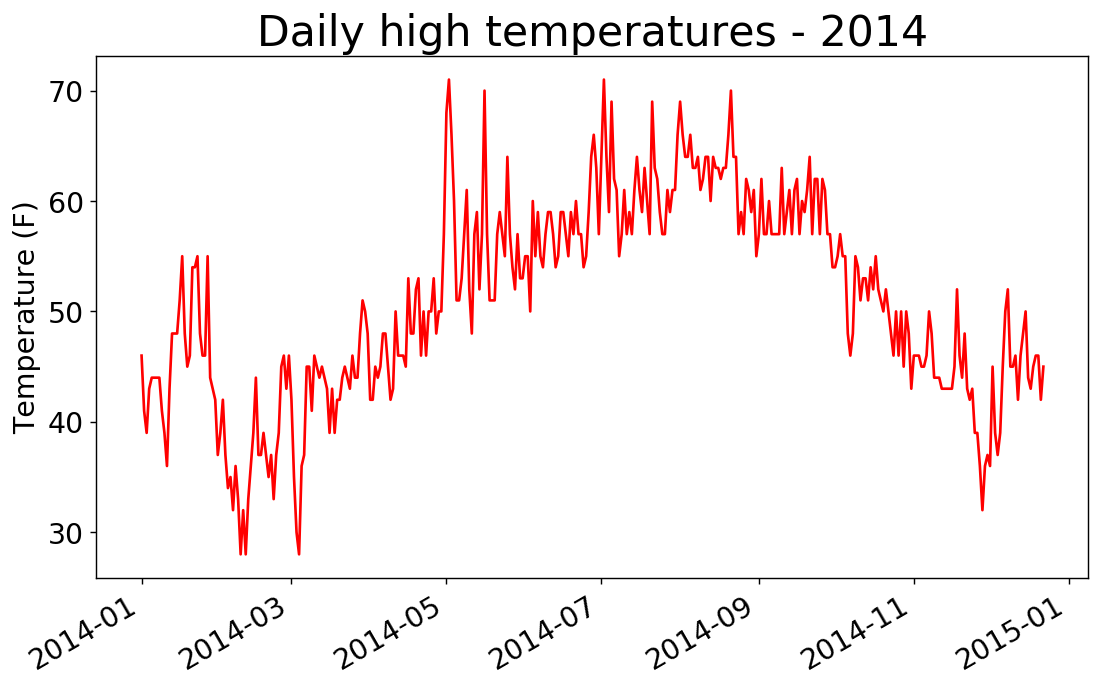

In [43]:
import csv
from datetime import datetime

from matplotlib import pyplot as plt

# Get dates, and high temperatures from file.
filename = 'sitka_weather_2014.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)

    dates, highs = [], []
    for row in reader:
        current_date = datetime.strptime(row[0], "%Y-%m-%d")
        dates.append(current_date)
        
        high = int(row[1])
        highs.append(high)
        
# Plot data.
fig = plt.figure(dpi=128, figsize=(10, 6))
plt.plot(dates, highs, c='red')

# Format plot.
plt.title("Daily high temperatures - 2014", fontsize=24)
plt.xlabel('', fontsize=16)

fig.autofmt_xdate()

plt.ylabel("Temperature (F)", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.show()

### Plotting a Second Data Series

We want to extract the low temperatures from the data file and then add them to our graph.

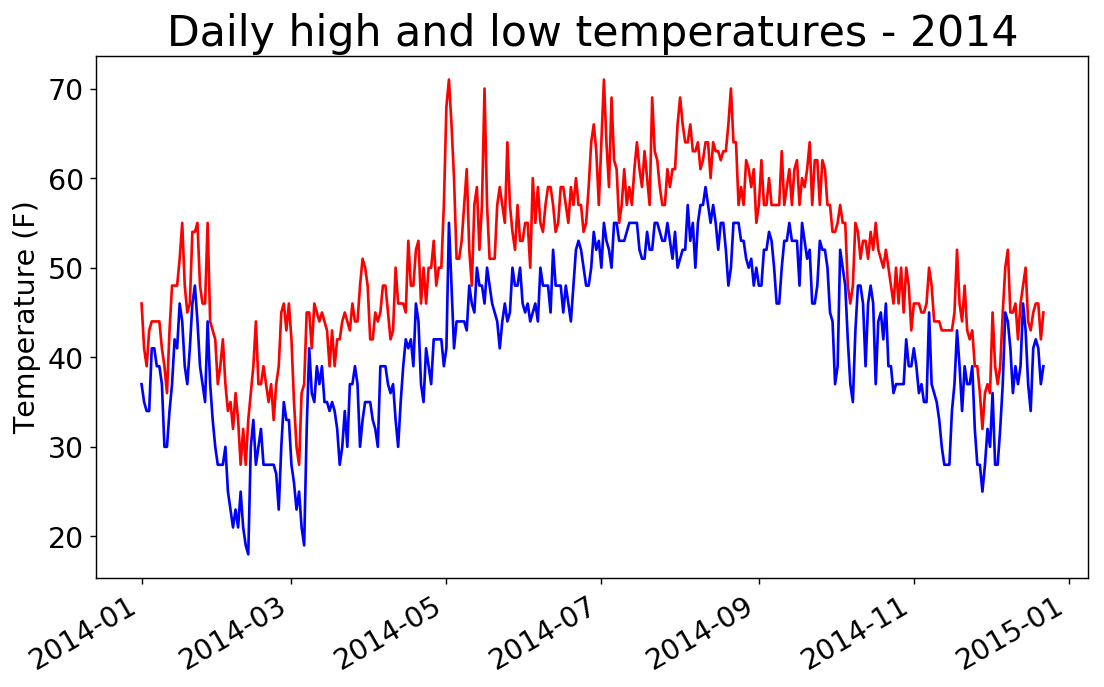

In [46]:
import csv
from datetime import datetime

from matplotlib import pyplot as plt

# Get dates, high, and low temperatures from file.
filename = 'sitka_weather_2014.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)

    dates, highs, lows = [], [], []
    for row in reader:
        current_date = datetime.strptime(row[0], "%Y-%m-%d")
        dates.append(current_date)
        
        high = int(row[1])
        highs.append(high)
        
        low = int(row[3])
        lows.append(low)
        
# Plot data.
fig = plt.figure(dpi=128, figsize=(10, 6))
plt.plot(dates, highs, c='red')
plt.plot(dates, lows, c='blue')

# Format plot.
plt.title("Daily high and low temperatures - 2014", fontsize=24)
plt.xlabel('', fontsize=16)

fig.autofmt_xdate()

plt.ylabel("Temperature (F)", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.show()

### Shading an Area in the Chart

`fill_between()` takes a series of x-values and 2 series of y-values, and fills the space between the 2 y-value series.

`alpha` controls a color's transparency. Where 0 means completely transparent. 

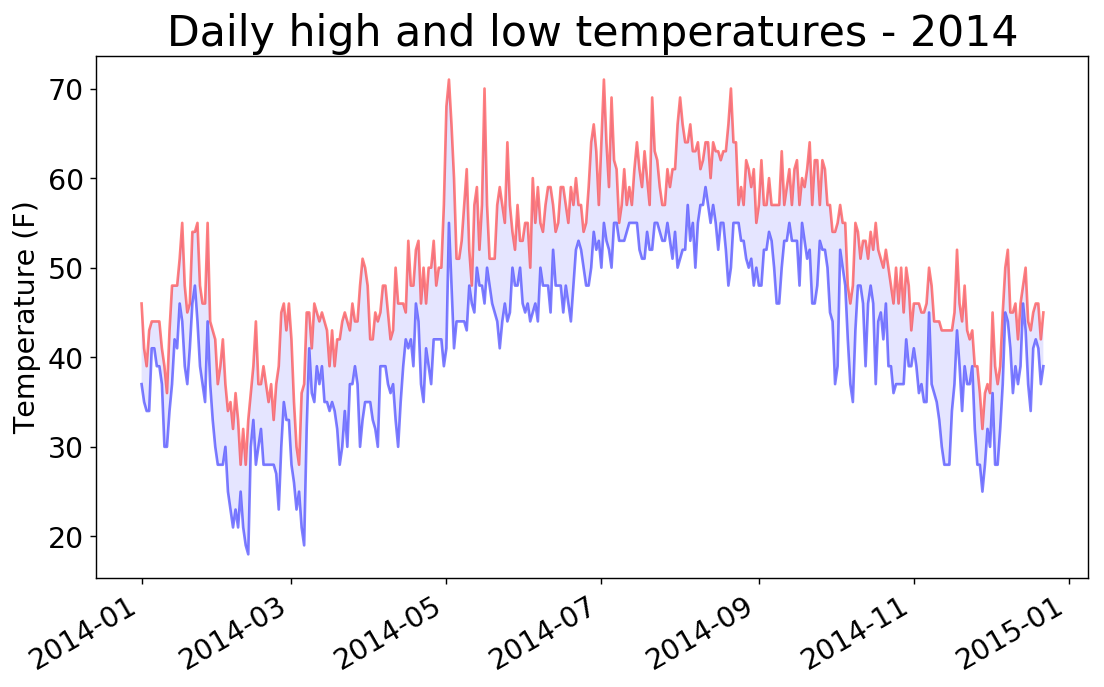

In [49]:
import csv
from datetime import datetime

from matplotlib import pyplot as plt

# Get dates, high, and low temperatures from file.
filename = 'sitka_weather_2014.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)

    dates, highs, lows = [], [], []
    for row in reader:
        current_date = datetime.strptime(row[0], "%Y-%m-%d")
        dates.append(current_date)
        
        high = int(row[1])
        highs.append(high)
        
        low = int(row[3])
        lows.append(low)
        
# Plot data.
fig = plt.figure(dpi=128, figsize=(10, 6))


plt.plot(dates, highs, c='red', alpha=0.5)
plt.plot(dates, lows, c='blue', alpha=0.5)
plt.fill_between(dates, highs, lows, facecolor='blue', alpha=0.1)

# Format plot.
plt.title("Daily high and low temperatures - 2014", fontsize=24)
plt.xlabel('', fontsize=16)

fig.autofmt_xdate()

plt.ylabel("Temperature (F)", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.show()

### Error-Checking

Missing data can result in exceptions that crash our programs if we don't handle them properly.

On Feb 16, 2014 no data was recorded.

In [52]:
import csv
from datetime import datetime

from matplotlib import pyplot as plt

# Get dates, high, and low temperatures from file.
filename = 'death_valley_2014.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)

    dates, highs, lows = [], [], []
    for row in reader:
        current_date = datetime.strptime(row[0], "%Y-%m-%d")
        dates.append(current_date)
        
        high = int(row[1])
        highs.append(high)
        
        low = int(row[3])
        lows.append(low)
        
# Plot data.
fig = plt.figure(dpi=128, figsize=(10, 6))


plt.plot(dates, highs, c='red', alpha=0.5)
plt.plot(dates, lows, c='blue', alpha=0.5)
plt.fill_between(dates, highs, lows, facecolor='blue', alpha=0.1)

# Format plot.
plt.title("Daily high and low temperatures - 2014", fontsize=24)
plt.xlabel('', fontsize=16)

fig.autofmt_xdate()

plt.ylabel("Temperature (F)", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.show()

ValueError: invalid literal for int() with base 10: ''

To address this issue, we'll run error checking code when the values are being read from the CSV file to handle exceptions that might arise when we parse our data sets.

2014-02-16 00:00:00 missing data


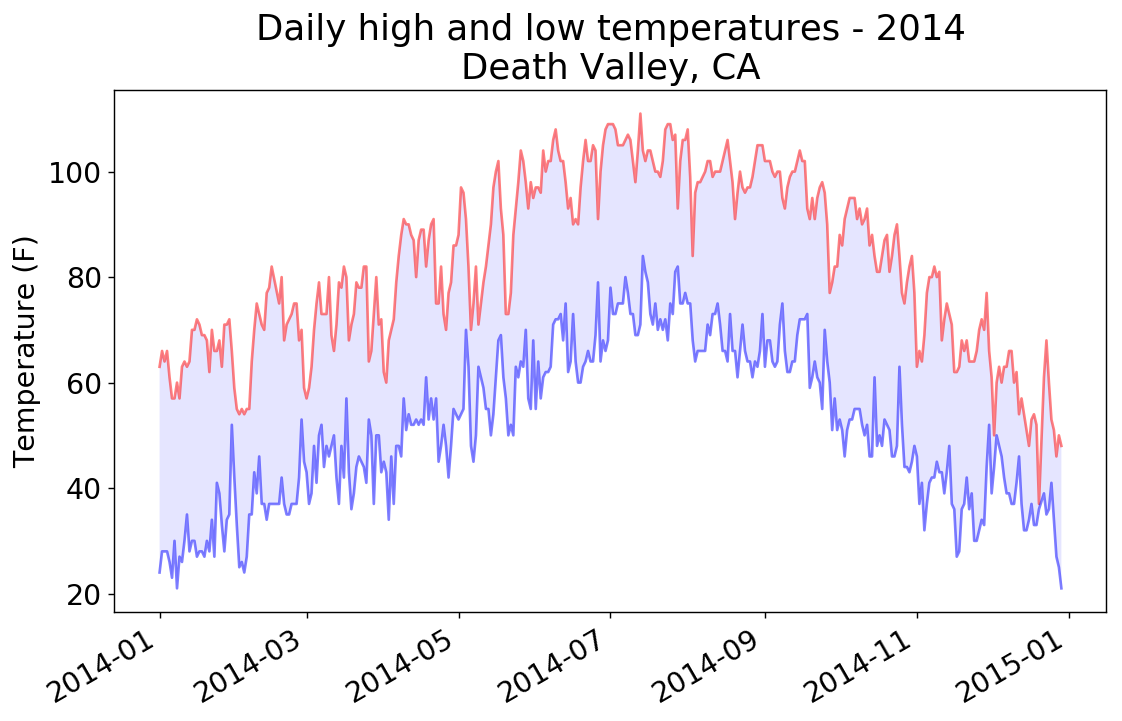

In [55]:
import csv
from datetime import datetime

from matplotlib import pyplot as plt

# Get dates, high, and low temperatures from file.
filename = 'death_valley_2014.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)

    dates, highs, lows = [], [], []
    for row in reader:
        try:
            current_date = datetime.strptime(row[0], "%Y-%m-%d")
            high = int(row[1])
            low = int(row[3])
        except ValueError:
            print(current_date, 'missing data')
        else:
            dates.append(current_date)
            highs.append(high)
            lows.append(low)

# Plot data.
fig = plt.figure(dpi=128, figsize=(10, 6))
plt.plot(dates, highs, c='red', alpha=0.5)
plt.plot(dates, lows, c='blue', alpha=0.5)
plt.fill_between(dates, highs, lows, facecolor='blue', alpha=0.1)

# Format plot.
title = "Daily high and low temperatures - 2014\nDeath Valley, CA"
plt.title(title, fontsize=20)
plt.xlabel('', fontsize=16)
fig.autofmt_xdate()
plt.ylabel("Temperature (F)", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.show()

Here we used a `try-except-else` block to handle missing data. Sometimes you will use `continue` to skip over some data or `remove()` or `del` to eliminate some data after it's been extracted.